# India ML Hiring Hackathon 


## 1. Getting started

In [1]:
# Mounting Google Drive
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
# Importing the libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Setting path
os.chdir("E:/Data Science/India ML Hiring Hackathon")
print("Current working directory is:" + os.getcwd())

Current working directory is:E:\Data Science\India ML Hiring Hackathon


In [4]:
# Importing the dataset
Train = pd.read_csv("./Input/train.csv")
Test = pd.read_csv("./Input/test.csv")
Sample_submission = pd.read_csv("./Input/sample_submission.csv")

## 2. Glimpse of data

In [5]:
# Shape of data
print("Number of rows and columns in train dataset:",Train.shape)
print("Number of rows and columns in test dataset:",Test.shape)

Number of rows and columns in train dataset: (116058, 29)
Number of rows and columns in test dataset: (49739, 28)


In [6]:
# Variable structure
print("-----------------Variable Structure of training data--------------")
Train.info()
print("-----------------Variable Structure of test data------------------")
Test.info()

-----------------Variable Structure of training data--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1 

In [7]:
print("Missing value in Train data:", Train.isnull().sum().sum())
print("Missing value in Test data:", Test.isnull().sum().sum())

Missing value in Train data: 0
Missing value in Test data: 0


In [8]:
# Top 5 rows
Train.head(5)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [9]:
# Checking distribution of Product_Category
print("The unique number of Product Categories: ",len(Train['m13'].unique()))
print("Below are the distribution of each categories in Train data:")
Train['m13'].value_counts(normalize = True)

The unique number of Product Categories:  2
Below are the distribution of each categories in Train data:


0    0.99452
1    0.00548
Name: m13, dtype: float64

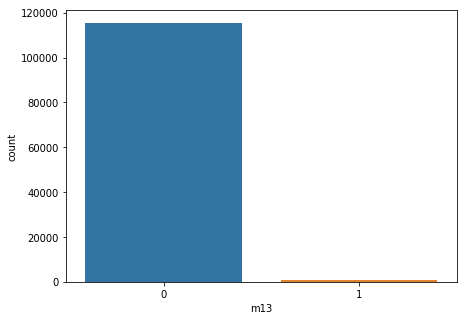

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'm13', data = Train);

It is clearly visible from above analysis that we are dealing with unbalanced classification problem.


# 3. Data Preprocessing
Let's preprocess our data for building classification model. As we already discussed above that our main variable of interest is text and drug. On this variable, we are going to apply various techniques.

### 3.1 Visualize class separation by numeric features

In [11]:
num_var = Train.select_dtypes(include=['int64','float64']).columns.tolist()
num_var.remove('loan_id')
num_var.remove('m13')
print(num_var)

['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']


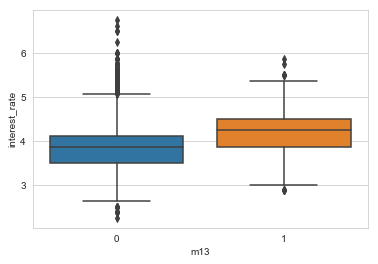

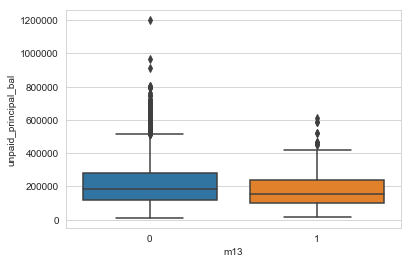

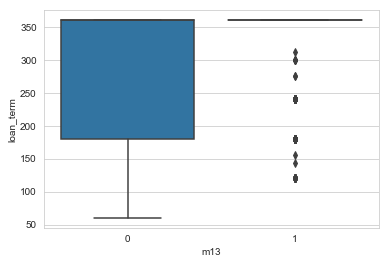

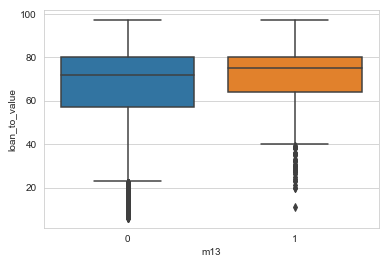

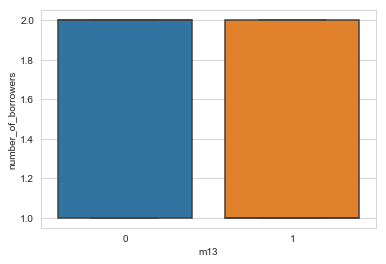

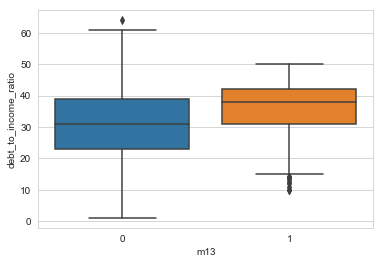

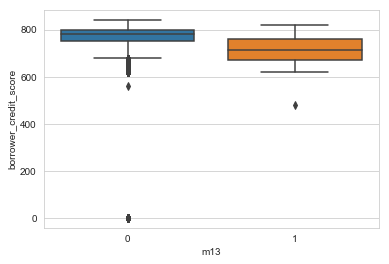

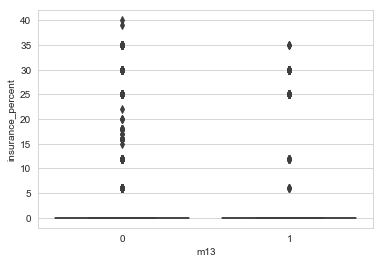

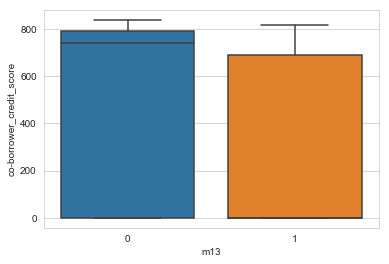

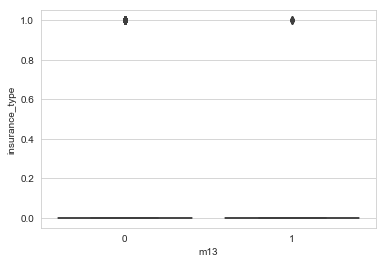

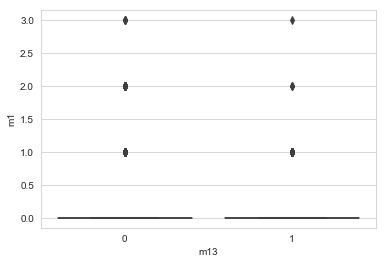

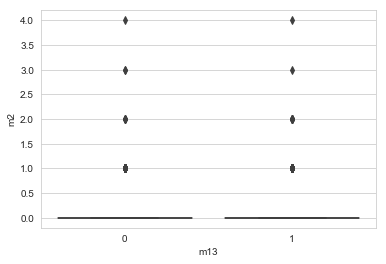

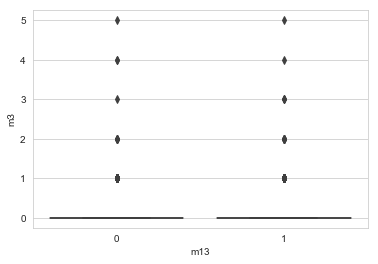

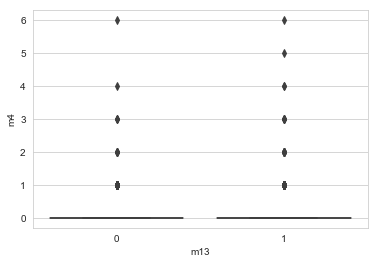

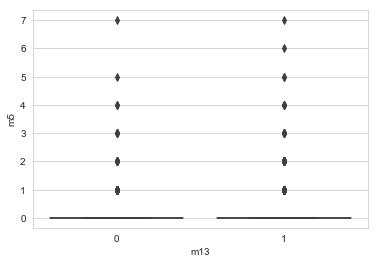

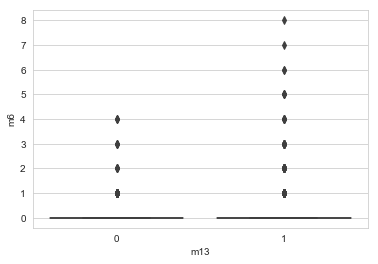

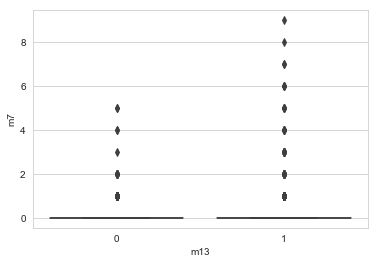

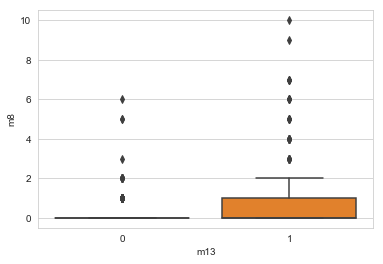

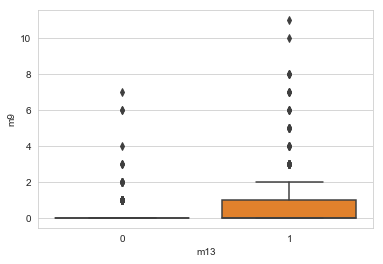

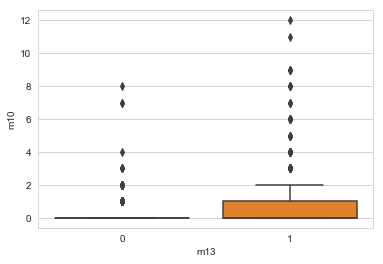

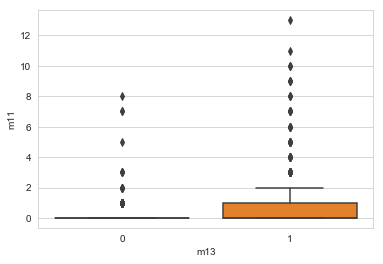

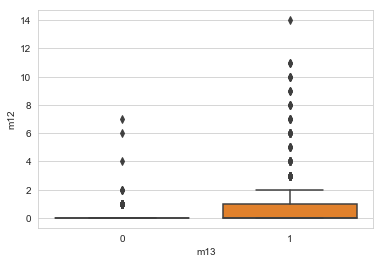

In [12]:
def plot_box(data, cols, col_x = 'm13'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=data)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_box(data = Train, cols = num_var, col_x = 'm13')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


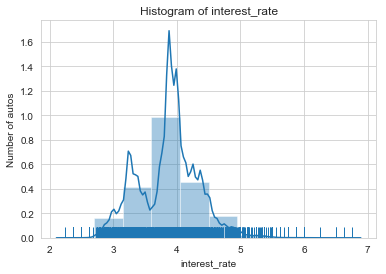

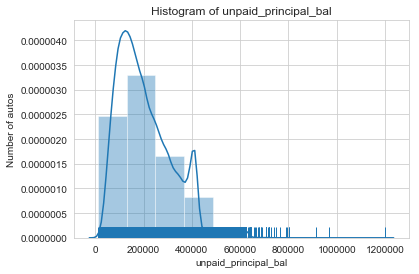

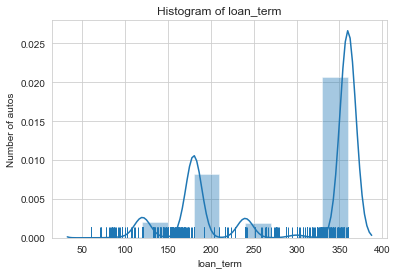

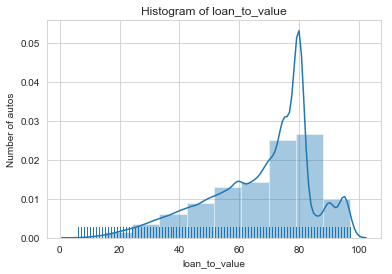

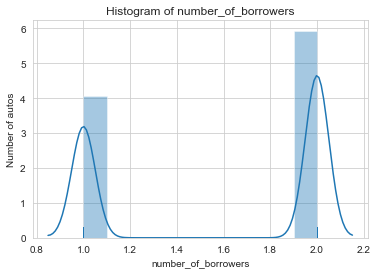

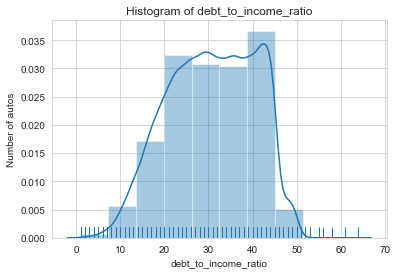

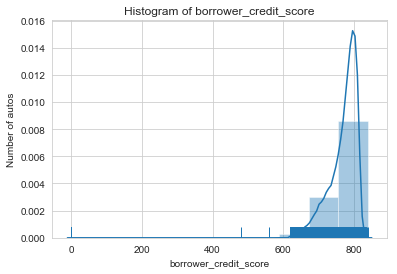

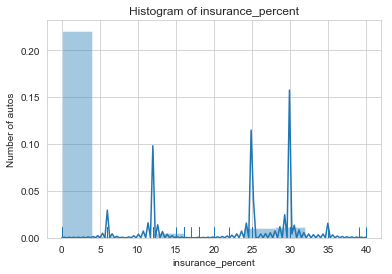

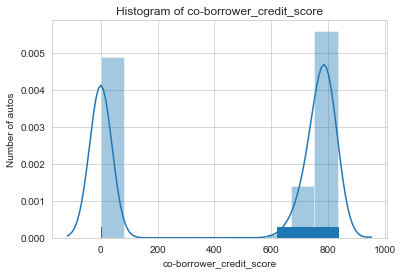

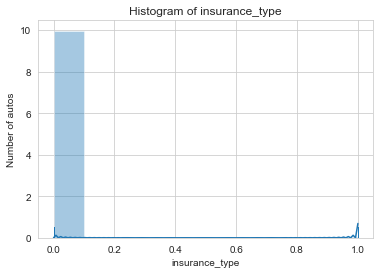

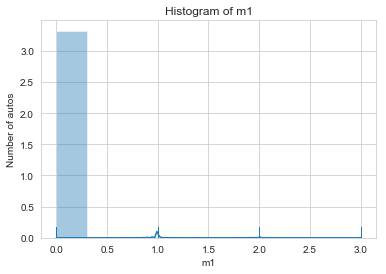

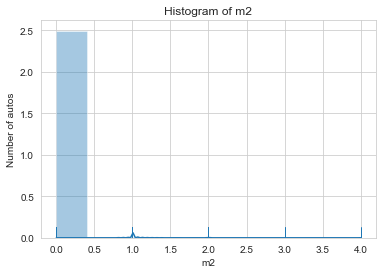

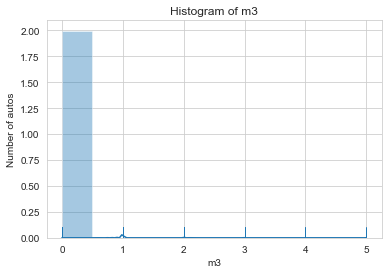

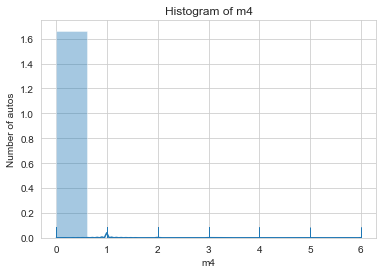

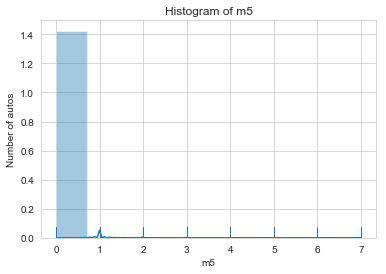

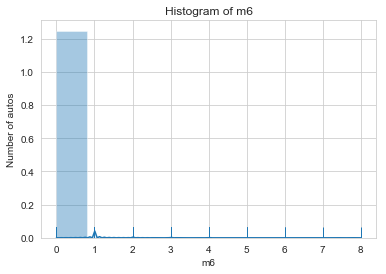

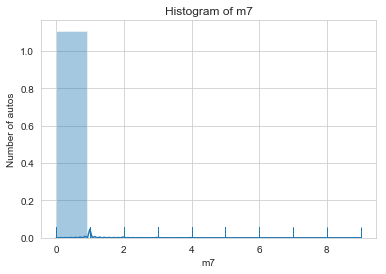

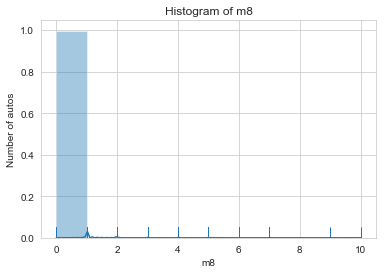

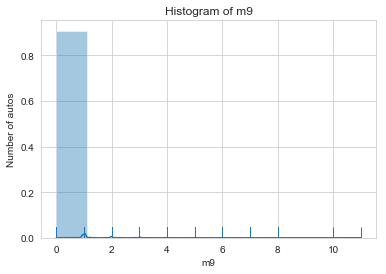

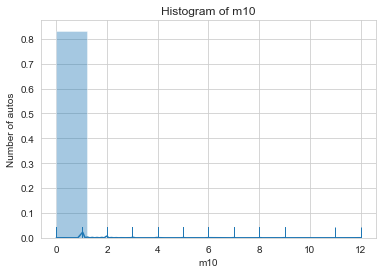

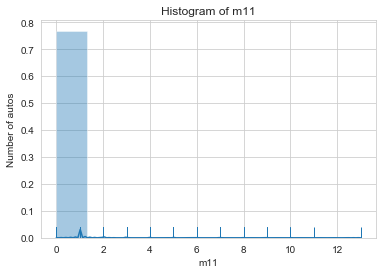

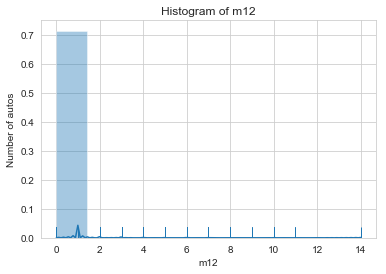

In [13]:
def plot_density_hist(Train, cols, bins = 10, hist = True):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(Train[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of autos')# Set text for y axis
        plt.show()
        
plot_density_hist(Train, num_var)        

### 3.2 Visualize class separation by categorical features

In [14]:
cat_var = Train.select_dtypes(include=['object']).columns.tolist()
print(cat_var)

['source', 'financial_institution', 'origination_date', 'first_payment_date', 'loan_purpose']


source


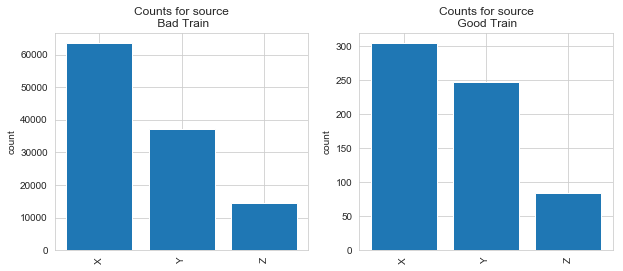

financial_institution


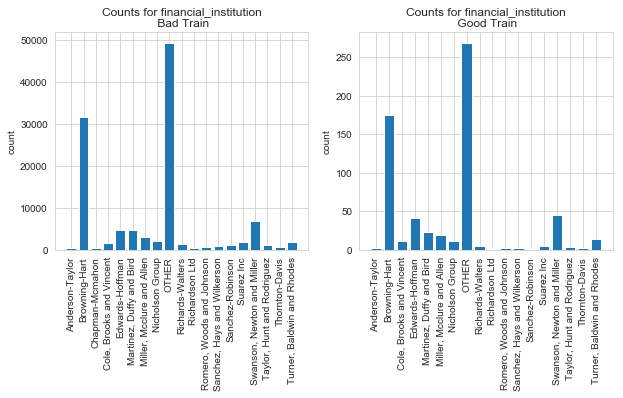

origination_date


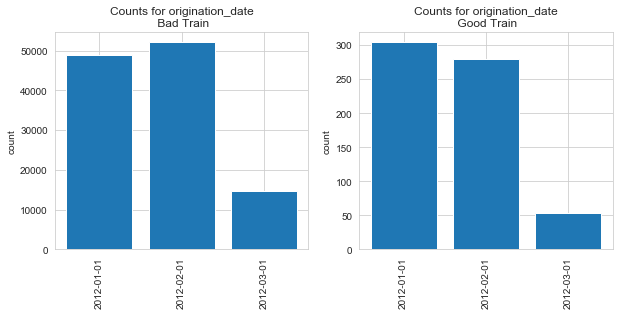

first_payment_date


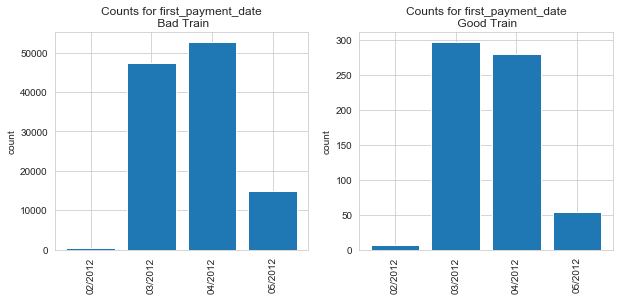

loan_purpose


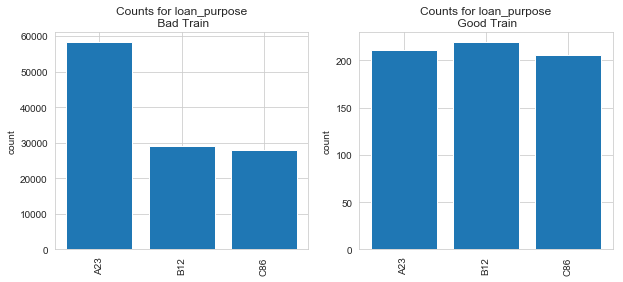

In [15]:
Train['dummy'] = np.ones(shape = Train.shape[0])
for col in cat_var:
    print(col)
    counts = Train[['dummy', 'm13', col]].groupby(['m13', col], as_index = False).count()
    temp = counts[counts['m13'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['m13'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Bad Train')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['m13'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Good Train')
    plt.ylabel('count')
    plt.show()

## 4. Machine Learning

### Data Preprocessing

In [16]:
Train['DataFlag'] = 'Train'
Test['DataFlag'] = 'Test'

frames = [Train, Test]
dataset = pd.concat(frames, sort=False)
dataset.shape
dataset.head(5)
dataset.tail(5)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m6,m7,m8,m9,m10,m11,m12,m13,dummy,DataFlag
49734,264379066904,X,OTHER,4.125,192000,360,2012-01-01,03/2012,80,1.0,...,0,0,0,0,0,0,0,NaN,NaN,Test
49735,956879854897,X,OTHER,4.000,299000,360,2012-02-01,04/2012,79,1.0,...,0,0,0,0,0,0,0,NaN,NaN,Test
49736,935570254826,X,OTHER,3.625,200000,360,2012-02-01,04/2012,80,2.0,...,0,0,0,0,0,0,0,NaN,NaN,Test
49737,848042430115,Z,OTHER,3.625,320000,360,2012-02-01,04/2012,63,2.0,...,0,0,0,0,0,0,0,NaN,NaN,Test
49738,790421833115,X,OTHER,3.875,122000,360,2012-01-01,03/2012,70,1.0,...,0,1,0,0,0,0,0,NaN,NaN,Test


### Lable Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset["source"] = le.fit_transform(dataset["source"])
dataset["financial_institution"] = le.fit_transform(dataset["financial_institution"])
dataset["origination_date"] = le.fit_transform(dataset["origination_date"])
dataset["first_payment_date"] = le.fit_transform(dataset["first_payment_date"])
dataset["loan_purpose"] = le.fit_transform(dataset["loan_purpose"])
dataset.head(5)

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m6,m7,m8,m9,m10,m11,m12,m13,dummy,DataFlag
0,268055008619,2,18,4.250,214000,360,2,3,95,1.0,...,0,1,0,0,0,0,0,1.0,1.0,Train
1,672831657627,1,15,4.875,144000,360,0,1,72,1.0,...,0,0,0,0,0,1,0,1.0,1.0,Train
2,742515242108,2,17,3.250,366000,180,0,1,49,1.0,...,0,0,0,0,0,0,0,1.0,1.0,Train
3,601385667462,0,8,4.750,135000,360,1,2,46,2.0,...,0,0,0,1,1,1,1,1.0,1.0,Train
4,273870029961,0,8,4.750,124000,360,1,2,80,1.0,...,5,6,7,8,9,10,11,1.0,1.0,Train


In [18]:
#Dummy Variables:
dataset = pd.get_dummies(dataset, columns=['source', 'financial_institution', 'origination_date', 'first_payment_date', 'loan_purpose'],drop_first= True)


In [19]:
# checking the new columns of dataset
dataset.columns


Index(['loan_id', 'interest_rate', 'unpaid_principal_bal', 'loan_term',
       'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio',
       'borrower_credit_score', 'insurance_percent',
       'co-borrower_credit_score', 'insurance_type', 'm1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12', 'm13', 'dummy',
       'DataFlag', 'source_1', 'source_2', 'financial_institution_1',
       'financial_institution_2', 'financial_institution_3',
       'financial_institution_4', 'financial_institution_5',
       'financial_institution_6', 'financial_institution_7',
       'financial_institution_8', 'financial_institution_9',
       'financial_institution_10', 'financial_institution_11',
       'financial_institution_12', 'financial_institution_13',
       'financial_institution_14', 'financial_institution_15',
       'financial_institution_16', 'financial_institution_17',
       'financial_institution_18', 'origination_date_1', 'origination_date_2',
       '

In [20]:
dataset.shape

(165797, 53)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165797 entries, 0 to 49738
Data columns (total 53 columns):
loan_id                     165797 non-null int64
interest_rate               165797 non-null float64
unpaid_principal_bal        165797 non-null int64
loan_term                   165797 non-null int64
loan_to_value               165797 non-null int64
number_of_borrowers         165797 non-null float64
debt_to_income_ratio        165797 non-null float64
borrower_credit_score       165797 non-null float64
insurance_percent           165797 non-null float64
co-borrower_credit_score    165797 non-null float64
insurance_type              165797 non-null float64
m1                          165797 non-null int64
m2                          165797 non-null int64
m3                          165797 non-null int64
m4                          165797 non-null int64
m5                          165797 non-null int64
m6                          165797 non-null int64
m7                        

In [23]:
#Divide into test and train:
train = dataset.loc[dataset['DataFlag'] == "Train"]
test = dataset.loc[dataset['DataFlag'] == "Test"]

#Drop unnecessary columns:
test.drop(['DataFlag'],axis=1,inplace=True)
train.drop(['DataFlag'],axis=1,inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [24]:
train.head(5)
train.shape

(116058, 52)

In [25]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49739 entries, 0 to 49738
Data columns (total 52 columns):
loan_id                     49739 non-null int64
interest_rate               49739 non-null float64
unpaid_principal_bal        49739 non-null int64
loan_term                   49739 non-null int64
loan_to_value               49739 non-null int64
number_of_borrowers         49739 non-null float64
debt_to_income_ratio        49739 non-null float64
borrower_credit_score       49739 non-null float64
insurance_percent           49739 non-null float64
co-borrower_credit_score    49739 non-null float64
insurance_type              49739 non-null float64
m1                          49739 non-null int64
m2                          49739 non-null int64
m3                          49739 non-null int64
m4                          49739 non-null int64
m5                          49739 non-null int64
m6                          49739 non-null int64
m7                          49739 non-null i

In [26]:
train.head(5)

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,financial_institution_16,financial_institution_17,financial_institution_18,origination_date_1,origination_date_2,first_payment_date_1,first_payment_date_2,first_payment_date_3,loan_purpose_1,loan_purpose_2
0,268055008619,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,...,0,0,1,0,1,0,0,1,0,1
1,672831657627,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
2,742515242108,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,...,0,1,0,0,0,1,0,0,1,0
3,601385667462,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,...,0,0,0,1,0,0,1,0,1,0
4,273870029961,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,1


## Model Building

In [27]:
#Define target and ID columns:
target = 'm13'
IDcol = ['loan_id']
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    skf = StratifiedKFold(n_splits = 10)
    cv_score = cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=skf, scoring='roc_auc')
    #cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("AUC : %.4g" % (metrics.roc_auc_score((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),
                                                                             np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict_proba(dtest[predictors])[:,1]
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

# Creating Target variable and feature dataset

In [29]:
# Creating X and Y 
X = train.iloc[:,0:52].values
Y = train.iloc[:,24].values

### Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

predictors = train.columns.drop(['loan_id'])
modelfit(LR, train, test, predictors, target, IDcol, 'LR.csv')

#coef1 = pd.Series(LR.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients');

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t


Model Report
AUC : 0.4998
CV Score : Mean - 0.7905 | Std - 0.02024 | Min - 0.7501 | Max - 0.8248


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [33]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

predictors = train.columns.drop(['loan_id'])
modelfit(KNN, train, test, predictors, target, IDcol, 'KNN.csv')



Model Report
AUC : 0.5008
CV Score : Mean - 0.5443 | Std - 0.01933 | Min - 0.5191 | Max - 0.5901


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').